In [1]:
from nltk.corpus import abc
import numpy as np 
import string 
import re
import multiprocessing
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.keras.utils import to_categorical

def find_closest(word_index, vectors):
    query_vector = vectors[word_index]
    min_dist = 100**2 # to act like positive infinity
    min_index = -1.0

    for index, vector in enumerate(vectors):
        euc1=np.sqrt(np.sum((vector-query_vector)**2))
        if not np.array_equal(vector, query_vector) and  min_dist > euc1 :
            euc2=np.sqrt(np.sum((vector-query_vector)**2))
            min_index,min_dist  = index,euc2

    return min_index

import nltk
import sys
from collections import OrderedDict
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import gensim
from nltk.corpus import abc
tf.compat.v1.disable_eager_execution()

def to_one_hot(dpi, vocab_size):
    temp = np.zeros(vocab_size)
    temp[dpi] = 1.0 #1
    return temp
#INITS
sess = tf.Session()
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
from sklearn.manifold import TSNE
model = TSNE(n_components=3, random_state=0)
np.set_printoptions(suppress=True)

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from nltk.corpus import stopwords  
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))     

nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Package abc is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
stop_words=list(stop_words)

In [0]:
words=abc.words()

In [5]:
len(abc.sents())

29059

In [0]:
sentences=abc.sents()[0:100]
# sentences=[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]

In [0]:
sentences;

In [0]:
words=[]
sent=[]
for i in sentences:
    temp=[]
    for j in i:
        if j not in stop_words and j.isalpha():
            words.append(j)
            temp.append(j)
    sent.append(temp)

words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
x_train = [] # input word
y_train = [] # output word
vocab_size = len(words) # gives the total number of unique words


In [0]:
sentences=sent
sentences;

In [10]:
EMBEDDING_DIM = 6 
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
type(b1)
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
type(W1)

tensorflow.python.ops.variables.RefVariable

In [0]:
WINDOW_SIZE = 2
data = []
WINDOW_SIZE_NEXT = WINDOW_SIZE+1
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : 1 + min(WINDOW_SIZE + word_index , len(sentence))] : 
            data.append([word, nb_word])

In [0]:
data;

In [0]:
for ind,word in enumerate(words):
    int2word[ind] = word
    word2int[word] = ind

In [0]:
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

# convert them to numpy arrays
x_train = np.asarray(x_train)
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
hidden_representation = tf.add(tf.matmul(x,W1), b1)
y_train = np.asarray(y_train) 
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [15]:
print(x_train.size== y_train.size)

True


In [0]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))

In [17]:
type(W2)

tensorflow.python.ops.variables.RefVariable

In [0]:
b2 = tf.Variable(tf.random_normal([vocab_size]))

In [19]:
type(b2)

tensorflow.python.ops.variables.RefVariable

In [0]:
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [0]:
sess.run( tf.global_variables_initializer())

cross_entropy_loss = tf.reduce_mean(-1*tf.reduce_sum( tf.log(prediction) * y_label , reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(cross_entropy_loss)
n_iters = 345
for fml_ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})


In [0]:
# print(vectors[ word2int['PM'] ])


In [0]:

vectors =  normalizer.fit_transform(model.fit_transform(sess.run(W1 + b1)), 'l2')

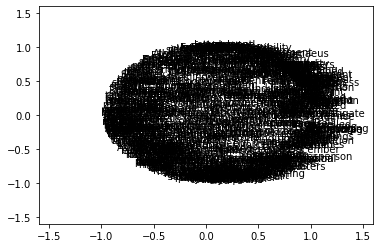

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    # print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
smol=True
if smol:
    plt.xlim(-1.6,1.6)
    plt.ylim(-1.6,1.6)
else:
    plt.xlim(-2,3)
    plt.ylim(-2,3)


plt.show()

